In [83]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cell2location
from matplotlib import rcParams
from cell2location.utils.filtering import filter_genes

from cell2location.models import RegressionModel

rcParams['pdf.fonttype'] = 42 # enables correct plotting of text for PDFs

results_folder = 'cell2location/results/lymph_nodes_analysis/'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}reference_signatures'
run_name = f'{results_folder}/cell2location_map'

In [56]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
torch.set_float32_matmul_precision('high')  # Ou 'high' se quiser mais desempenho

In [57]:
adata_file = f"{ref_run_name}/sc.h5ad"
adata_ref = sc.read_h5ad(adata_file)

In [58]:
model = cell2location.models.RegressionModel.load(f"{ref_run_name}", adata_ref)

INFO     File cell2location/results/lymph_nodes_analysis/reference_signatures/model.pt already downloaded          


INFO: GPU available: True (cuda), used: True


[03/08/25 19:55:19] INFO     GPU available: True (cuda), used: True                                 ]8;id=142566;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=768373;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

INFO: TPU available: False, using: 0 TPU cores


                    INFO     TPU available: False, using: 0 TPU cores                               ]8;id=667046;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=849982;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

INFO: HPU available: False, using: 0 HPUs


                    INFO     HPU available: False, using: 0 HPUs                                    ]8;id=284309;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=88675;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

                    WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=428242;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=707677;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/lightning/pytorch/trainer/configura                
                             tion_validator.py:68: You passed in a `val_dataloader` but have no                    
                             `validation_step`. Skipping val loop.                                                 
                                                                                                                   

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


                    INFO     LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]                                   ]8;id=813405;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning/pytorch/accelerators/cuda.py\cuda.py]8;;\:]8;id=341903;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning/pytorch/accelerators/cuda.py#61\61]8;;\

                    WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=882828;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=126054;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/lightning/pytorch/trainer/connector                
                             s/data_connector.py:425: The 'train_dataloader' does not have many                    
                             workers which may be a bottleneck. Consider increasing the value of                   
                             the `num_workers` argument` to `num_workers=31` in the `DataLoader` to                
                             improve performance.                                                                  
                                                                                                                   

Training:   0%|          | 0/273 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=1` reached.


                    INFO     `Trainer.fit` stopped: `max_steps=1` reached.                          ]8;id=425358;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=282973;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

In [59]:
adata_ref


AnnData object with n_obs × n_vars = 73260 × 10237
    obs: 'Age', 'BCELL_CLONE', 'BCELL_CLONE_SIZE', 'Donor', 'ID', 'IGH_MU_FREQ', 'ISOTYPE', 'LibraryID', 'Method', 'Population', 'PrelimCellType', 'Sample', 'Sex', 'Study', 'Tissue', 'barcode', 'batch', 'doublet_score', 'index', 'predicted_doublet', 'percent_mito', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'VDJsum', 'cell_cycle_diff', 'PrelimCellType_new', 'leiden', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'CellType', 'CellType2', 'Subset', 'Subset_Broad', 'Subset_all', 'new_celltype', 'Subset_int', 'Subset_print', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'GeneName-2', 'feature_types', 'feature_types-0', 'feature_types-1', 'gene_ids-1', 'gene_ids-4861STDY7135913-0', 'gene_ids-4861STDY7135914-0', 'gene_ids-4861STDY7208412-0', 'gene_ids-4861STDY7208413-0', 'gene_ids-Human_colon_16S7255677-0', 'gene_ids-Human_colon_16S7255678-0', 'gene_ids-Human_colon_16S8000484-0', 'gene_ids-Pan_T7935494-0', 'genome-1', 'n

In [60]:
inf_aver = adata_ref.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}' \
                                           for i in adata_ref.uns['mod']['factor_names']]]
inf_aver.columns = adata_ref.uns['mod']['factor_names']

In [62]:
#prepare visium data

adata_vis = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata_vis.obs['sample'] = list(adata_vis.uns['spatial'].keys())[0]

adata_vis.var['SYMBOL'] = adata_vis.var_names
adata_vis.var.set_index('gene_ids', drop=True, inplace=True)

# find mitochondria-encoded (MT) genes
adata_vis.var['MT_gene'] = [gene.startswith('MT-') for gene in adata_vis.var['SYMBOL']]

# remove MT genes for spatial mapping (keeping their counts in the object)
adata_vis.obsm['MT'] = adata_vis[:, adata_vis.var['MT_gene'].values].X.toarray()
adata_vis = adata_vis[:, ~adata_vis.var['MT_gene'].values]

[03/08/25 19:55:51] WARNING  /tmp/ipykernel_3797297/3521166600.py:3: FutureWarning: Use             ]8;id=212209;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=496186;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             `squidpy.datasets.visium` instead.                                                    
                               adata_vis = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")                 
                                                                                                                   

                    WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=599992;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=665029;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/scanpy/datasets/_datasets.py:558:                  
                             FutureWarning: Use `squidpy.read.visium` instead.                                     
                               return read_visium(sample_dir, source_image_path=source_image_path)                 
                                                                                                                   

[03/08/25 19:55:52] WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=832283;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=853474;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/anndata/_core/anndata.py:1758:                     
                             UserWarning: Variable names are not unique. To make them unique, call                 
                             `.var_names_make_unique`.                                                             
                               utils.warn_names_duplicates("var")                                                  
                                                                                                                   

[03/08/25 19:55:53] WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=497149;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=251121;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/anndata/_core/anndata.py:1758:                     
                             UserWarning: Variable names are not unique. To make them unique, call                 
                             `.var_names_make_unique`.                                                             
                               utils.warn_names_duplicates("var")                                                  
                                                                                                                   

In [63]:
np.intersect1d(adata_vis.var_names, inf_aver.index)


array(['ENSG00000000419', 'ENSG00000000457', 'ENSG00000000938', ...,
       'ENSG00000281103', 'ENSG00000282608', 'ENSG00000282851'],
      dtype=object)

In [64]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(adata_vis.var_names, inf_aver.index)
adata_vis = adata_vis[:, intersect].copy()
inf_aver = inf_aver.loc[intersect, :].copy()

In [65]:
inf_aver

,B_Cycling,B_GC_DZ,B_GC_LZ,B_GC_prePB,B_IFN,B_activated,B_mem,B_naive,B_plasma,B_preGC,...,T_CD4+_TfH,T_CD4+_TfH_GC,T_CD4+_naive,T_CD8+_CD161+,T_CD8+_cytotoxic,T_CD8+_naive,T_TIM3+,T_TfR,T_Treg,VSMC
GeneID-2,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,0.680595,0.225834,0.222059,0.111049,0.228663,0.113318,0.157451,0.113736,0.364837,0.273586,...,0.139133,0.173750,0.139851,0.131074,0.119653,0.156032,0.419716,0.209521,0.139526,0.363798
ENSG00000000457,0.095710,0.042541,0.047159,0.029583,0.027289,0.035180,0.039225,0.041430,0.056336,0.033733,...,0.024357,0.033483,0.036753,0.045978,0.027793,0.049613,0.105447,0.044706,0.039189,0.064216
ENSG00000000938,0.020163,0.005927,0.013104,0.016794,0.095655,0.095637,0.100731,0.090042,0.006116,0.044610,...,0.000333,0.000602,0.000797,0.012508,0.091333,0.000819,0.016427,0.001266,0.001059,0.206652
ENSG00000000971,0.000664,0.000640,0.000516,0.021975,0.007457,0.000549,0.000138,0.000259,0.002892,0.003874,...,0.004954,0.000465,0.000434,0.021812,0.005699,0.000600,0.004104,0.001561,0.000748,1.130937
ENSG00000001036,0.122272,0.076028,0.063999,0.032270,0.063946,0.018944,0.055911,0.021128,0.325037,0.029322,...,0.029117,0.057052,0.012465,0.041732,0.023787,0.009179,0.146583,0.055862,0.049691,0.482235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000280789,0.294225,0.088748,0.087329,0.129524,0.026389,0.036788,0.056316,0.050018,0.302446,0.071419,...,0.047453,0.087376,0.073427,0.056915,0.049412,0.084863,0.211162,0.076255,0.057672,0.178922
ENSG00000280987,0.353758,0.093274,0.093508,0.096117,0.011828,0.014193,0.026611,0.016420,0.023343,0.082898,...,0.005093,0.034051,0.012138,0.006403,0.004766,0.019663,0.057881,0.055837,0.006547,0.059392
ENSG00000281103,0.012923,0.002546,0.009120,0.049486,0.029375,0.002970,0.012192,0.001448,0.029933,0.005487,...,0.060792,0.208459,0.050520,0.189168,0.226103,0.082702,0.350554,0.182871,0.060829,0.035904


In [66]:
# prepare anndata for cell2location model
cell2location.models.Cell2location.setup_anndata(adata=adata_vis, batch_key="sample")

In [67]:
# create and train the model
model_cell2location = cell2location.models.Cell2location(
    adata_vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=30,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection:
    detection_alpha=20
)

In [2]:
import cell2location
help(cell2location.models.Cell2location.setup_anndata)

Help on method setup_anndata in module cell2location.models._cell2location_model:

setup_anndata(
    adata: anndata._core.anndata.AnnData,
    layer: Optional[str] = None,
    batch_key: Optional[str] = None,
    labels_key: Optional[str] = None,
    categorical_covariate_keys: Optional[List[str]] = None,
    continuous_covariate_keys: Optional[List[str]] = None,
    **kwargs
) class method of cell2location.models._cell2location_model.Cell2location
    Sets up the :class:`~anndata.AnnData` object for this model.

    A mapping will be created between data fields used by this model to their respective locations in
    adata. None of the data in adata are modified. Only adds fields to adata.

    Parameters
    ----------
    layer
        if not `None`, uses this as the key in `adata.layers` for raw count data.
    batch_key
        key in `adata.obs` for batch information. Categories will automatically be converted into
        integer categories and saved to `adata.obs['_scvi_batch']

In [68]:
mod.view_anndata_setup()

Anndata setup with scvi-tools version 1.2.2.post2.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'sample',
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 4035  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │   0   │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                       batch State Registry                        
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃     Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['sample'] │ V1_Human_Lymph_Node │          0          │
└─────────────────────┴─────────────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [69]:
model_cell2location.train(max_epochs=30000,
          # train using full data (batch_size=None)
          batch_size=None,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size=1
         )

INFO: GPU available: True (cuda), used: True


[03/08/25 19:56:31] INFO     GPU available: True (cuda), used: True                                 ]8;id=791564;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=619814;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

INFO: TPU available: False, using: 0 TPU cores


                    INFO     TPU available: False, using: 0 TPU cores                               ]8;id=463258;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=233075;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

INFO: HPU available: False, using: 0 HPUs


                    INFO     HPU available: False, using: 0 HPUs                                    ]8;id=941285;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=498365;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

                    WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=659937;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=272635;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/lightning/pytorch/trainer/configura                
                             tion_validator.py:68: You passed in a `val_dataloader` but have no                    
                             `validation_step`. Skipping val loop.                                                 
                                                                                                                   

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


                    INFO     LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]                                   ]8;id=376911;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning/pytorch/accelerators/cuda.py\cuda.py]8;;\:]8;id=611132;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning/pytorch/accelerators/cuda.py#61\61]8;;\

                    WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=964827;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=146253;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/lightning/pytorch/trainer/connector                
                             s/data_connector.py:425: The 'train_dataloader' does not have many                    
                             workers which may be a bottleneck. Consider increasing the value of                   
                             the `num_workers` argument` to `num_workers=31` in the `DataLoader` to                
                             improve performance.                                                                  
                                                                                                                   

                    WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=462454;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=655175;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py                
                             :310: The number of training batches (1) is smaller than the logging                  
                             interval Trainer(log_every_n_steps=10). Set a lower value for                         
                             log_every_n_steps if you want to see logs for the training epoch.                     
                                                                                                                   

Training:   0%|          | 0/30000 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=30000` reached.


[03/08/25 20:47:54] INFO     `Trainer.fit` stopped: `max_epochs=30000` reached.                     ]8;id=894765;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=873133;file:///storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-project-env/lib/python3.12/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

In [85]:
model_cell2location

cell2location model with the following params: 
n_factors: 34 
n_batch: 1 
Training status: Trained
<class 'cell2location.models._cell2location_model.Cell2location'>.__repr__ returned empty string

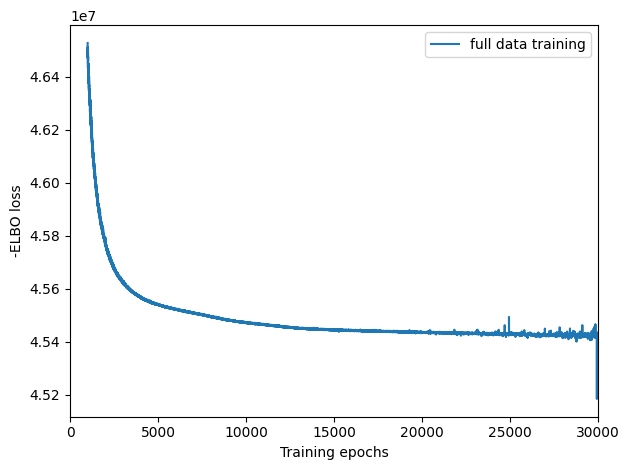

In [86]:
model_cell2location.plot_history(1000)
plt.legend(labels=['full data training']);

In [89]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_vis_export_posterior = model_cell2location.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 1000, 'batch_size': model_cell2location.adata.n_obs}
)

Sampling local variables, batch:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling global variables, sample:   0%|          | 0/999 [00:00<?, ?it/s]

In [88]:
adata_vis


AnnData object with n_obs × n_vars = 4035 × 10217
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'feature_types', 'genome', 'SYMBOL', 'MT_gene'
    uns: 'spatial', '_scvi_uuid', '_scvi_manager_uuid', 'mod'
    obsm: 'spatial', 'MT', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf'

In [90]:
adata_vis_export_posterior


AnnData object with n_obs × n_vars = 4035 × 10217
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'feature_types', 'genome', 'SYMBOL', 'MT_gene'
    uns: 'spatial', '_scvi_uuid', '_scvi_manager_uuid', 'mod'
    obsm: 'spatial', 'MT', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf'

In [91]:
# Save model
model_cell2location.save(f"{run_name}", overwrite=True)
# Save anndata object with results
adata_file = f"{run_name}/sp_map.h5ad"
adata_vis_export_posterior.write(adata_file)